#Setup and Loading WHU-Hi Dataset

In [1]:
# Upload the Kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"padmanabh03","key":"9c5bf7b26e7b13a2036c8a23ac13e3f3"}'}

In [2]:
# Make a directory for the Kaggle API key and move it there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Install Kaggle CLI
!pip install kaggle

# Download the dataset into the Colab notebook directory
!kaggle datasets download -d rupeshkumaryadav/whu-hyperspectral-dataset

Dataset URL: https://www.kaggle.com/datasets/rupeshkumaryadav/whu-hyperspectral-dataset
License(s): MIT
100% 844M/845M [00:49<00:00, 13.7MB/s]
100% 845M/845M [00:49<00:00, 18.0MB/s]


In [4]:
import zipfile
import os

# Extract the dataset
dataset_zip = "whu-hyperspectral-dataset.zip"
dataset_folder = "WHU_Hyperspectral_Dataset"

if not os.path.exists(dataset_folder):
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall(dataset_folder)
    print(f"Dataset extracted to: {dataset_folder}")
else:
    print(f"Dataset already extracted at: {dataset_folder}")

Dataset extracted to: WHU_Hyperspectral_Dataset


# Exploring the WHU-Hi Dataset

In [5]:
import os

# Define the base dataset path (update this if needed)
base_path = "/content/WHU_Hyperspectral_Dataset"

# List all directories and files in the dataset
for root, dirs, files in os.walk(base_path):
    print(f"Directory: {root}")
    for file in files:
        print(f" - {file}")

Directory: /content/WHU_Hyperspectral_Dataset
Directory: /content/WHU_Hyperspectral_Dataset/WHU-Hi-LongKou
 - WHU_Hi_LongKou_gt.mat
 - WHU_Hi_LongKou.mat
Directory: /content/WHU_Hyperspectral_Dataset/WHU-Hi-LongKou/Training samples and test samples
 - Test50.mat
 - Test100.mat
 - Test250.mat
 - Test300.mat
 - Test150.mat
 - Train300.mat
 - Train100.mat
 - Train150.mat
 - Test200.mat
 - Test25.mat
 - Train250.mat
 - Train200.mat
 - Train25.mat
 - Train50.mat
Directory: /content/WHU_Hyperspectral_Dataset/WHU-Hi-HongHu
 - WHU_Hi_HongHu.mat
 - WHU_Hi_HongHu_gt.mat
Directory: /content/WHU_Hyperspectral_Dataset/WHU-Hi-HongHu/Training samples and test samples
 - Test50.mat
 - Test100.mat
 - Test250.mat
 - Test300.mat
 - Test150.mat
 - Train300.mat
 - Train100.mat
 - Train150.mat
 - Test200.mat
 - Test25.mat
 - Train250.mat
 - Train200.mat
 - Train25.mat
 - Train50.mat
Directory: /content/WHU_Hyperspectral_Dataset/WHU-Hi-HanChuan
 - WHU_Hi_HanChuan.mat
 - WHU_Hi_HanChuan_gt.mat
Directory: /con

In [7]:
!pip install scipy numpy matplotlib scikit-learn spectral  # Example libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 16.5 MB/s eta 0:00:00


In [6]:
# Example paths; replace with your actual paths
data_path = '/content/drive/MyDrive/WHU_Hyperspectral_Dataset/WHU-Hi-LongKou'
image_file = '/content/WHU_Hyperspectral_Dataset/WHU-Hi-LongKou/WHU_Hi_LongKou.mat'
gt_file = '/content/WHU_Hyperspectral_Dataset/WHU-Hi-LongKou/WHU_Hi_LongKou_gt.mat'

In [8]:
data_mat = loadmat(image_file)   # Dictionary-like object
gt_mat   = loadmat(gt_file)

# The actual hyperspectral data might be under a specific key, e.g., 'WHU_Hi_LongKou'
# Check the keys: data_mat.keys()

hyperspectral_image = data_mat['WHU_Hi_LongKou']  # shape could be (height, width, bands)
ground_truth_labels = gt_mat['WHU_Hi_LongKou_gt'] # shape might be (height, width)

In [19]:
# # Check the variable names (keys) inside each .mat
# print("Keys in data_mat:", data_mat.keys())
# print("Keys in gt_mat:", gt_mat.keys())

Keys in data_mat: dict_keys(['__header__', '__version__', '__globals__', 'WHU_Hi_LongKou'])
Keys in gt_mat: dict_keys(['__header__', '__version__', '__globals__', 'WHU_Hi_LongKou_gt'])


In [9]:
print("Hyperspectral Image shape:", hyperspectral_image.shape)
print("Ground Truth shape:", ground_truth_labels.shape)

Hyperspectral Image shape: (550, 400, 270)
Ground Truth shape: (550, 400)


# Exploration and Visulization

##Visualize a Single Spectral Band

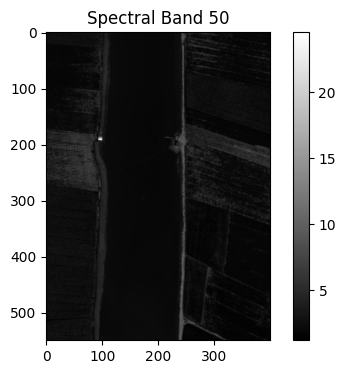

In [10]:
# Let’s pick band 50 as an example
band_idx = 50
plt.figure(figsize=(6, 4))
plt.imshow(hyperspectral_image[:, :, band_idx], cmap='gray')
plt.title(f"Spectral Band {band_idx}")
plt.colorbar()
plt.show()

##View a Pixel’s Spectral Signature

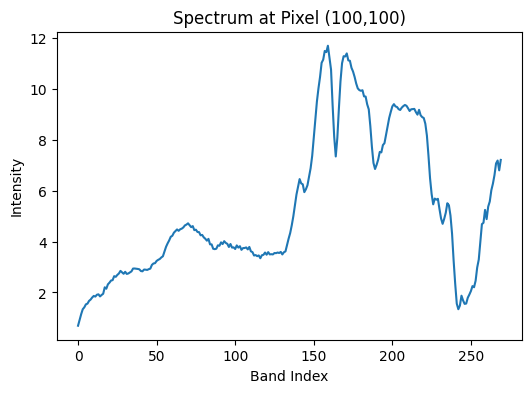

In [11]:
# Choose a pixel (row, col)
row, col = 100, 100
pixel_spectrum = hyperspectral_image[row, col, :]
plt.figure(figsize=(6, 4))
plt.plot(pixel_spectrum)
plt.title(f"Spectrum at Pixel ({row},{col})")
plt.xlabel("Band Index")
plt.ylabel("Intensity")
plt.show()

In [12]:
# Flatten the ground truth to count how many pixels of each class
gt_flat = ground_truth_labels.flatten()
unique_labels, counts = np.unique(gt_flat, return_counts=True)
print("Class Distribution:")
for lbl, cnt in zip(unique_labels, counts):
    print(f"Class {lbl}: {cnt} pixels")

Class Distribution:
Class 0: 15458 pixels
Class 1: 34511 pixels
Class 2: 8374 pixels
Class 3: 3031 pixels
Class 4: 63212 pixels
Class 5: 4151 pixels
Class 6: 11854 pixels
Class 7: 67056 pixels
Class 8: 7124 pixels
Class 9: 5229 pixels


# Dummy Calibration Coefficents

In [20]:
# Suppose the sensor has B bands, each with an offset, gain, and bandwidth
H, W, B = hyperspectral_image.shape

# Fake offsets, gains, and bandwidths for illustration (random example)
offset = np.zeros(B)     # e.g., all zeros if the sensor is well-corrected
gain = np.ones(B) * 0.1  # assume each DN * 0.1 -> radiance
bandwidth = np.ones(B)   # if each band has 1 nm width (oversimplified)

# Real data would come from sensor documentation:
# offset[i], gain[i], and bandwidth[i] for each spectral band i

In [30]:
# Let's say the pixel's digital number (DN) = 520
# And we have a dummy offset = 20, gain = 0.1
DN_pixel = 520
dummy_offset = 20
dummy_gain = 0.1

# Calculate radiance
radiance_value = (DN_pixel - dummy_offset) * dummy_gain
print("Radiance value:", radiance_value)

Radiance value: 50.0


In [21]:
radiance_cube = np.zeros_like(hyperspectral_image, dtype=float)

for i in range(B):
    # Radiance = (DN - offset) * gain
    # We do a band-by-band operation
    radiance_cube[:, :, i] = (hyperspectral_image[:, :, i] - offset[i]) * gain[i]

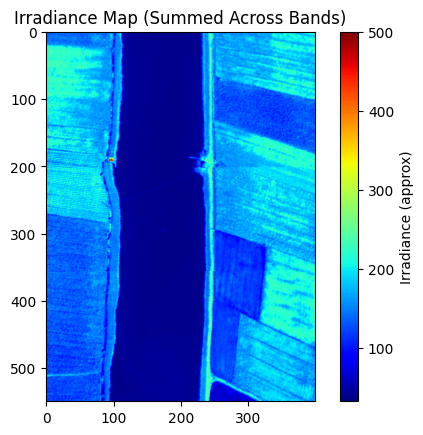

In [22]:
irradiance_map = np.zeros((H, W), dtype=float)

for i in range(B):
    # Add contribution from each band = radiance * spectral bandwidth
    irradiance_map += radiance_cube[:, :, i] * bandwidth[i]

plt.imshow(irradiance_map, cmap='jet')
plt.colorbar(label="Irradiance (approx)")
plt.title("Irradiance Map (Summed Across Bands)")
plt.show()

# Classification (Pixel-Wise)

---



In [15]:
valid_mask = ground_truth_labels > 0
valid_pixels = hyperspectral_image[valid_mask, :]   # shape: (num_valid_pixels, bands)
valid_labels = ground_truth_labels[valid_mask]      # shape: (num_valid_pixels,)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    valid_pixels,
    valid_labels,
    test_size=0.3,      # 30% for testing
    random_state=42
)

In [24]:
# import torch
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     10459
           2       0.91      0.93      0.92      2512
           3       0.98      0.81      0.89       921
           4       0.97      0.99      0.98     18905
           5       0.92      0.78      0.85      1270
           6       0.99      1.00      1.00      3588
           7       1.00      1.00      1.00     19965
           8       0.95      0.94      0.95      2177
           9       0.96      0.91      0.94      1566

    accuracy                           0.98     61363
   macro avg       0.96      0.93      0.94     61363
weighted avg       0.98      0.98      0.98     61363



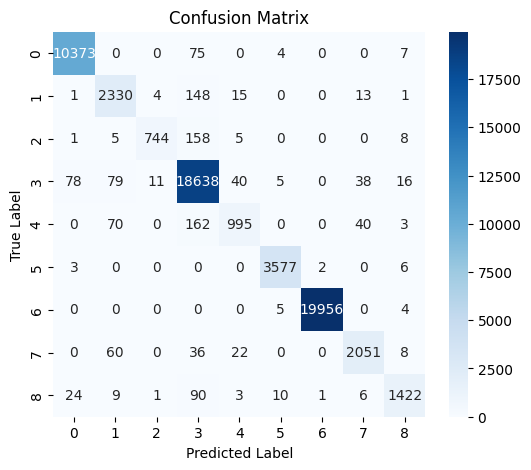

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plot a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Segmentation (Pixel-Wise Classification Map)

In [28]:
H, W, B = hyperspectral_image.shape
reshaped_data = hyperspectral_image.reshape(-1, B)  # shape: (H*W, B)

full_pred = clf.predict(reshaped_data)    # Predict for every pixel
classification_map = full_pred.reshape(H, W) # Reshape back to (H, W)

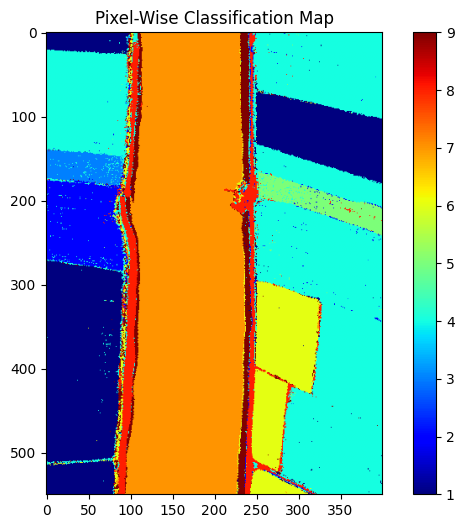

In [29]:
plt.figure(figsize=(8,6))
plt.imshow(classification_map, cmap='jet')
plt.colorbar()
plt.title("Pixel-Wise Classification Map")
plt.show()